In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('rep2.csv')

In [5]:
df.shape

(5641810, 5)

In [6]:
sample = df.sample(10000)

In [7]:
sample.head()

,barcode,barcode_id,abs_X,abs_Y,cellID
3116013,5188,6,-787.80,1826.90,767
3067229,20486,12,-1541.30,1748.40,155
4598649,18624,133,622.39,2300.00,2257
550408,8457,52,1577.70,938.59,2949
2785013,6784,59,-313.50,1446.80,1377


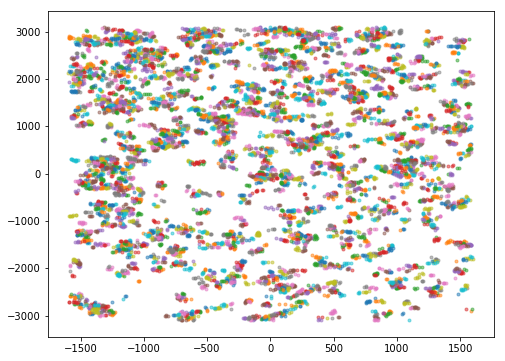

In [8]:
figsize(8, 6)
for i, group in sample.groupby('cellID'):
    plt.scatter(group.abs_X, group.abs_Y, marker='.', alpha=0.5);

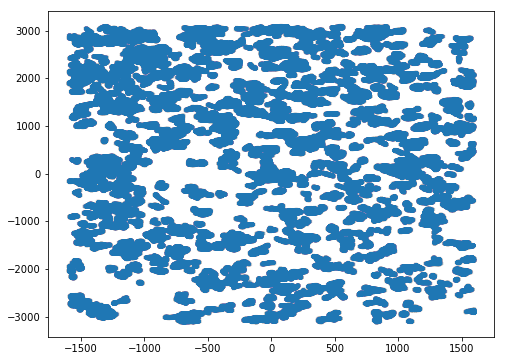

In [9]:
plt.scatter(df.abs_X, df.abs_Y, marker='.', alpha=1e-2);

In [10]:
df.barcode_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140])

In [11]:
df.cellID.unique().shape

(2612,)

In [12]:
codebook = pd.read_csv('codebook.csv', skiprows=3)

In [13]:
codebook.head()

,name,id,barcode
0,Blank-1,,11100000001000
1,Blank-10,,1001100100000000
2,Blank-2,,11000100100000
3,Blank-3,,11010001000000
4,Blank-4,,10010000001100


In [14]:
', '.join(codebook.name)

'Blank-1, Blank-10, Blank-2, Blank-3, Blank-4, Blank-5, Blank-6, Blank-7, Blank-8, Blank-9, AKAP11, CBX5, CCDC113, CEMIP, SIPA1L3, UMPS, HEATR5B, SLC9A2, YIPF4, LRP1, TMOD2, NOTCH2, THBS1, DNAJC13, HERC2, FAF2, TTPAL, PIK3CA, CBL, AGPS, POLQ, FAM184B, AFF4, ANKRD52, TSPAN3, MYH10, SCUBE3, PHIP, EGFR, SLC7A11, SMARCA5, ANKH, STARD9, USP24, FZD5, FYCO1, BSN, LMTK2, RNF169, DIP2B, SRRM2, PRPF8, FASN, DSEL, ARL10, CKAP5, RNF152, PRKDC, TLN1, TNRC6A, FBN1, IL17RA, CRTAP, MED14, SSH1, FAM208B, PAPPA, KPNA4, TSTD2, PRDM2, RAD51D, PROSER1, SKP1, THSD4, MAN1A2, SPTBN1, IGF2R, PRRC2B, AFAP1, KLHL9, DYNC1H1, ALPK2, CENPF, PTPN14, PLXNA2, TPR, BUB3, ASCC3, RBM20, DOPEY1, RAB3B, COL5A1, GTF3C4, GPR107, UBR2, CHST3, AGO3, ZBTB43, AHDC1, CNR2, KIAA1462, ZCCHC6, USP9X, SLC35B4, XDH, BRCA2, SLC5A3, ITPR2, CREBBP, C17orf51, PLXNA1, USP8, CEP250, USP34, SLC38A1, NRIP1, SAMD12, PRKCA, LUZP1, NKTR, AMOTL1, MCF2L, DIEXF, SULT1C2, UBR5, KIF13B, FZD4, MALAT1, KIAA1147, SMIM5, SOD2, C14orf132, ZNF592, CDYL2, V

In [15]:
df.head()

,barcode,barcode_id,abs_X,abs_Y,cellID
0,4124,1,-1407.2,-2946.6,2
1,4124,1,-1414.0,-2944.6,2
2,4124,1,-1418.6,-2939.3,2
3,4124,1,-1435.7,-2924.8,3
4,4124,1,-1441.0,-2918.5,3


In [16]:
df['gene'] = codebook.loc[df.barcode_id - 1, 'name'].as_matrix()

In [17]:
df.head()

,barcode,barcode_id,abs_X,abs_Y,cellID,gene
0,4124,1,-1407.2,-2946.6,2,Blank-1
1,4124,1,-1414.0,-2944.6,2,Blank-1
2,4124,1,-1418.6,-2939.3,2,Blank-1
3,4124,1,-1435.7,-2924.8,3,Blank-1
4,4124,1,-1441.0,-2918.5,3,Blank-1


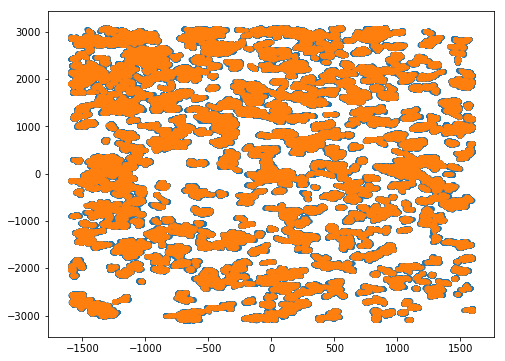

In [18]:
plt.scatter(df.abs_X, df.abs_Y, marker='.');

tmp = df.query('gene == "MALAT1"')
plt.scatter(tmp.abs_X, tmp.abs_Y, marker='.');

In [19]:
middle = df.query('-450 < abs_X < 600 & -450 < abs_Y < 600')

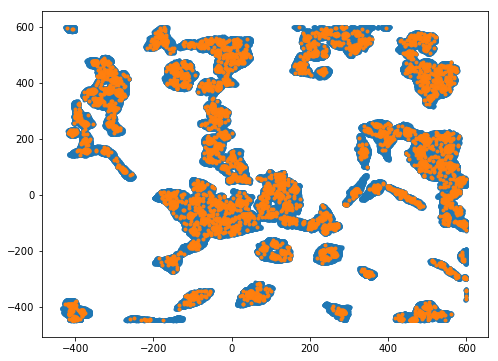

In [20]:
plt.scatter(middle.abs_X, middle.abs_Y, marker='.');

tmp = middle.query('gene == "MALAT1"')
plt.scatter(tmp.abs_X, tmp.abs_Y, marker='.');

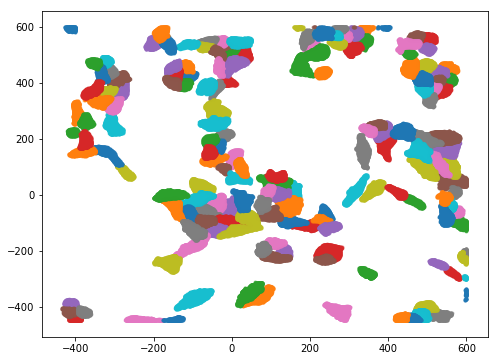

In [21]:
for i, group in middle.groupby('cellID'):
    plt.scatter(group.abs_X, group.abs_Y, marker='.', alpha=0.5);

In [23]:
middle.gene.value_counts().head()

THBS1     14780
MALAT1    12066
FASN      10590
TLN1       9599
SRRM2      8602
Name: gene, dtype: int64

In [32]:
middle.groupby(pd.cut( middle['abs_X'], 3))

In [71]:
N = 600
grid_counts = middle.groupby( [pd.cut( middle['abs_X'], N), pd.cut( middle['abs_Y'], N)] ).count()['abs_X'].to_frame()

In [72]:
img_mat = grid_counts.unstack()

In [73]:
img_mat.max().max()

23.0

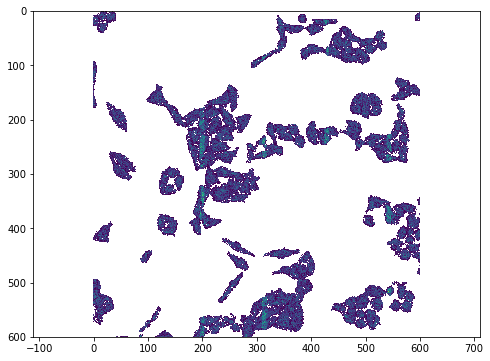

In [74]:
plt.imshow(img_mat / img_mat.max().max());
plt.axis('equal');

In [105]:
final_img.shape

(600, 600, 3)

In [140]:
', '.join(list(middle.gene.unique()))

'Blank-1, Blank-10, Blank-5, Blank-6, Blank-7, Blank-8, Blank-9, AKAP11, CBX5, CCDC113, SIPA1L3, UMPS, HEATR5B, SLC9A2, LRP1, TMOD2, NOTCH2, THBS1, DNAJC13, HERC2, FAF2, TTPAL, PIK3CA, CBL, AGPS, POLQ, FAM184B, AFF4, ANKRD52, MYH10, SCUBE3, EGFR, SLC7A11, SMARCA5, ANKH, STARD9, USP24, FZD5, FYCO1, BSN, LMTK2, RNF169, DIP2B, SRRM2, PRPF8, FASN, DSEL, ARL10, CKAP5, RNF152, PRKDC, TLN1, TNRC6A, FBN1, IL17RA, CRTAP, MED14, SSH1, FAM208B, KPNA4, PRDM2, RAD51D, PROSER1, SKP1, THSD4, MAN1A2, SPTBN1, IGF2R, PRRC2B, AFAP1, DYNC1H1, CENPF, PTPN14, PLXNA2, TPR, BUB3, ASCC3, RAB3B, COL5A1, GTF3C4, GPR107, CHST3, AGO3, ZBTB43, AHDC1, CNR2, KIAA1462, ZCCHC6, USP9X, SLC35B4, XDH, ITPR2, CREBBP, C17orf51, PLXNA1, USP8, CEP250, USP34, SLC38A1, NRIP1, SAMD12, PRKCA, LUZP1, NKTR, AMOTL1, DIEXF, SULT1C2, UBR5, KIF13B, FZD4, MALAT1, KIAA1147, SMIM5, SOD2, ZNF592, CDYL2, VPS13D, AGAP1, XKR5, FBN2, RP4-671O14.6, NHSL2, Blank-2, Blank-3, Blank-4, CEMIP, YIPF4, TSPAN3, PHIP, PAPPA, TSTD2, KLHL9, ALPK2, RBM20, 

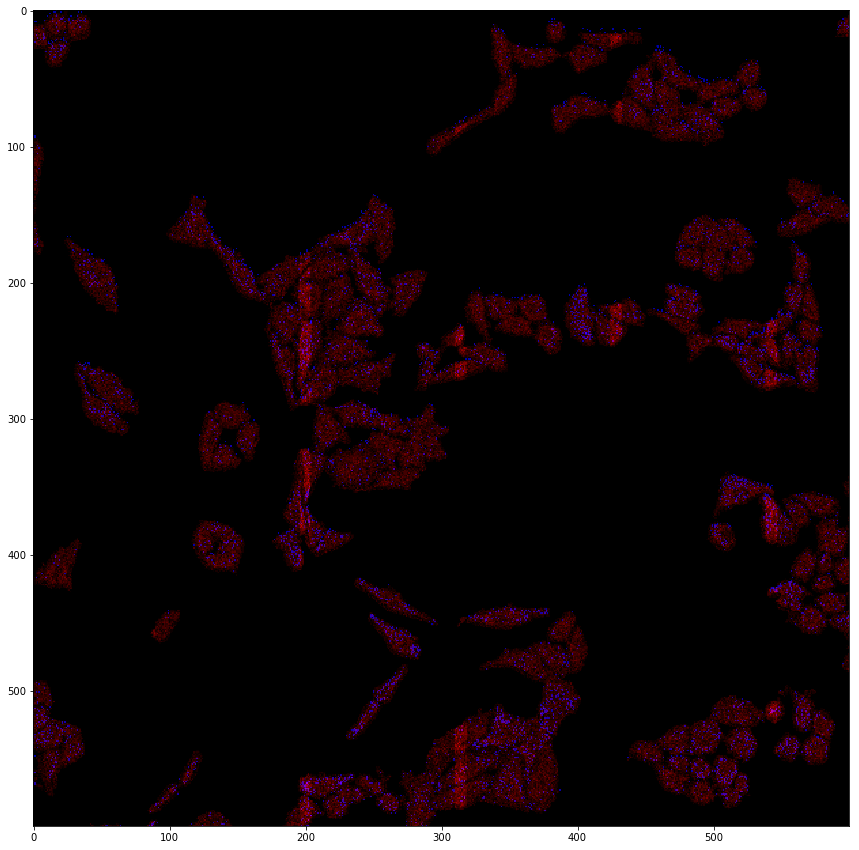

In [146]:
figsize(15, 15)
# tmp = middle.query('gene == "MALAT1"')
tmp = middle
N = 600
grid_counts = tmp.groupby( [pd.cut( tmp['abs_X'], N), pd.cut( tmp['abs_Y'], N)] ).count()['abs_X'].to_frame()
img_mat = grid_counts.unstack()

final_img = np.zeros((img_mat.shape + (3,)))

# final_img[:, :, 1] = np.nan

final_img[:, :, 0] = img_mat.replace(np.nan, 0)


tmp = middle.query('gene == "CENPF"')
N = 600
grid_counts = tmp.groupby( [pd.cut( tmp['abs_X'], N), pd.cut( tmp['abs_Y'], N)] ).count()['abs_X'].to_frame()
img_mat = grid_counts.unstack()

final_img[:, :, 2] = img_mat.replace(np.nan, 0)

final_img[:, :, 0] /= final_img[:, :, 0].max()
final_img[:, :, 2] /= final_img[:, :, 2].max() * 0.1

plt.imshow(final_img);
# plt.imshow(np.log10(final_img + 1));

In [127]:
final_img[:, :, 0].max()

23.0

In [117]:
middle.cellID.unique().shape

(171,)

In [118]:
middle_left = df.query('-1600 < abs_X < -1000 & -450 < abs_Y < 600')

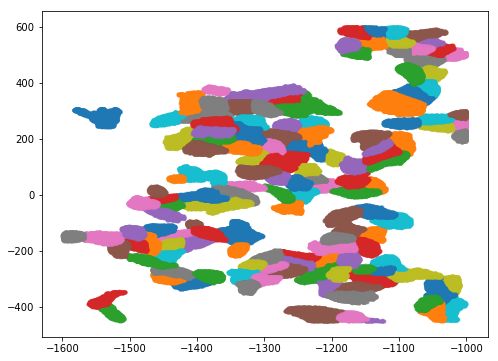

In [119]:
for i, group in middle_left.groupby('cellID'):
    plt.scatter(group.abs_X, group.abs_Y, marker='.', alpha=0.5);

In [120]:
middle_left.cellID.unique().shape

(146,)

In [131]:
upper_left = df.query('-1600 < abs_X < -600 & 1200 < abs_Y < 2500')

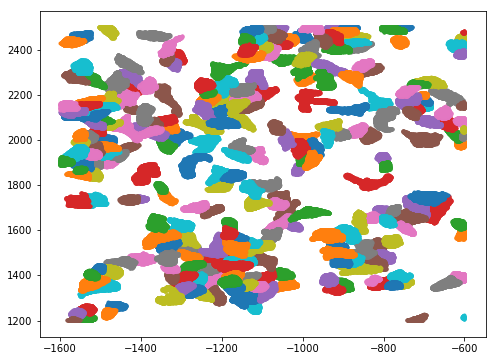

In [147]:
for i, group in upper_left.groupby('cellID'):
    plt.scatter(group.abs_X, group.abs_Y, marker='.');

In [133]:
upper_left.cellID.unique().shape

(280,)

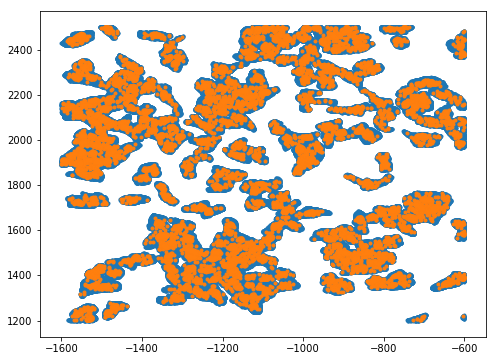

In [136]:
plt.scatter(upper_left.abs_X, upper_left.abs_Y, marker='.');

tmp = upper_left.query('gene == "MALAT1"')
plt.scatter(tmp.abs_X, tmp.abs_Y, marker='.');

# tmp = upper_left.query('gene == "RP4-671O14.6"')
# plt.scatter(tmp.abs_X, tmp.abs_Y, marker='.');

In [137]:
upper_left.shape

(584227, 6)

In [33]:
exp_mat = \
df.groupby(['cellID', 'gene']) \
    .count() \
    .iloc[:, 0] \
    .unstack() \
    .replace(np.nan, 0.0)

In [35]:
exp_mat = exp_mat.T[exp_mat.sum(0) >= 3].T

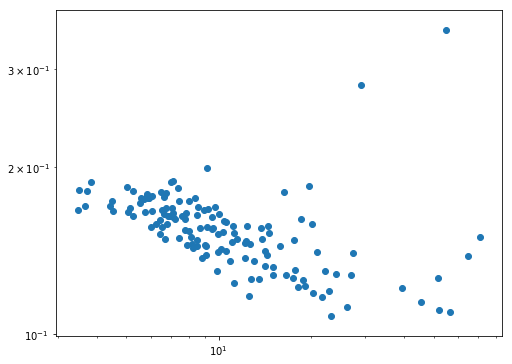

In [38]:
plt.loglog()
plt.scatter(10 ** (np.log10(exp_mat + 1).mean()) - 1, 10 ** (np.log10(exp_mat + 1).var()) - 1, alpha=1.);

In [45]:
np.log10(exp_mat + 1.).sum().sort_values()[::-1].head(10)

gene
MALAT1    4845.040267
FASN      4745.948444
TLN1      4597.617039
THBS1     4563.183586
SRRM2     4508.112997
SPTBN1    4496.473264
PRKDC     4351.666610
PRPF8     4201.059110
CENPF     3859.449803
CHST3     3795.419933
dtype: float64

In [53]:
np.log10(exp_mat + 1.).var().sort_values()[::-1].head(10)

gene
THBS1      0.131132
CENPF      0.107348
BSN        0.078802
ALPK2      0.075070
PLXNA2     0.074780
Blank-9    0.074690
CKAP5      0.073551
SAMD12     0.073383
RAB3B      0.073078
Blank-4    0.072379
dtype: float64

In [50]:
dfm = np.log10(exp_mat + 1.)

In [48]:
sample_info = \
df.groupby(['cellID']) \
    .mean()[['abs_X', 'abs_Y']]

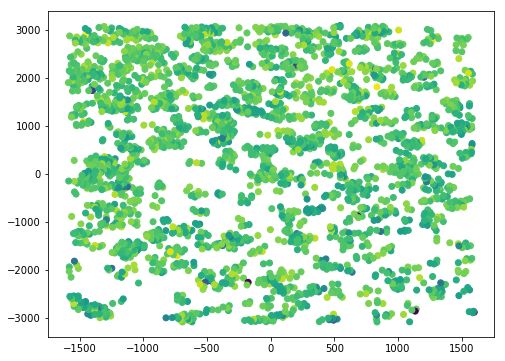

In [52]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['MALAT1']);

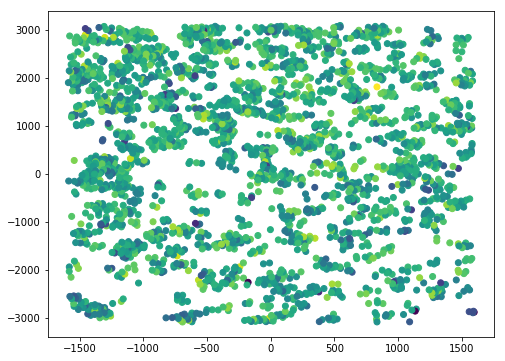

In [55]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['CENPF']);

In [56]:
X = sample_info[['abs_X', 'abs_Y']]

In [57]:
import SpatialDE as sde

In [58]:
results = sde.run(X, dfm)

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 1.5e+02s
INFO:root:Fitting gene models
INFO:root:Model 1 of 20
INFO:root:Model 2 of 20                           
INFO:root:Model 3 of 20                           
INFO:root:Model 4 of 20                           
INFO:root:Model 5 of 20                           
INFO:root:Model 6 of 20                           
INFO:root:Model 7 of 20                           
INFO:root:Model 8 of 20                           
INFO:root:Model 9 of 20                           
INFO:root:Model 10 of 20                          
INFO:root:Model 11 of 20                          
INFO:root:Model 12 of 20                          
INFO:root:Model 13 of 20                          
INFO:root:Model 14 of 20                          
INFO:root:Model 15 of 20                          
INFO:root:Model 16 of 20                          
INFO:root:Model 17 of 20                          
INFO:root:Model 18 of 20          

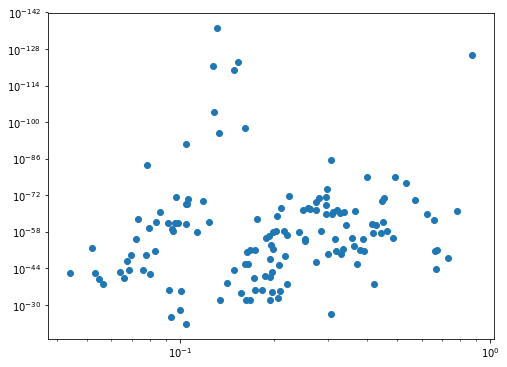

In [60]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval)
plt.gca().invert_yaxis();

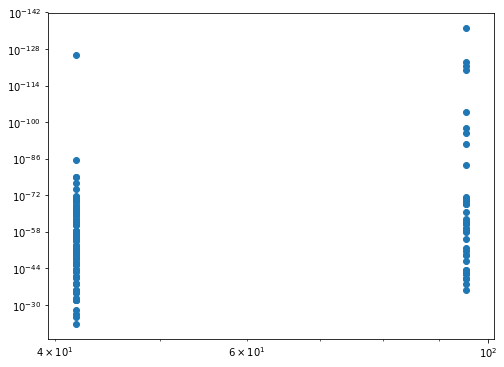

In [61]:
plt.loglog()
plt.scatter(results.l, results.pval)
plt.gca().invert_yaxis();

In [62]:
results.sort_values('pval').head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D,pval,qval
124,RP4-671O14.6,1.553071,123.509157,1.074937,0.131433,2612,0.001329,95.338046,4,SE,-215.546827,-120.937446,244.446603,7.067725e-137,9.894815e-135
81,THBS1,0.759714,-827.231847,1.734509,0.869772,2612,0.001655,41.851437,4,SE,1685.935180,-1053.063375,225.831528,2.275871e-126,3.186219e-124
107,C17orf51,1.699762,121.171823,1.203054,0.154051,2612,0.001216,95.338046,4,SE,-210.872160,-100.069588,221.241411,8.868728e-124,1.241622e-121
100,BSN,1.632282,-169.296214,1.031539,0.127272,2612,0.001229,95.338046,4,SE,370.063914,-387.962314,218.666100,2.519621e-122,3.527469e-120
119,NHSL2,1.775947,184.792777,1.192228,0.148637,2612,0.001226,95.338046,4,SE,-338.114068,-31.069419,215.862196,9.633264e-121,1.348657e-118


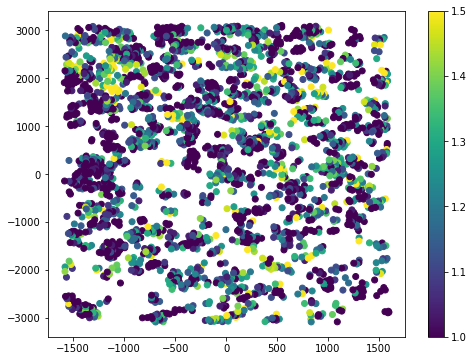

In [75]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['RP4-671O14.6'], vmin=1., vmax=1.5);
plt.colorbar();

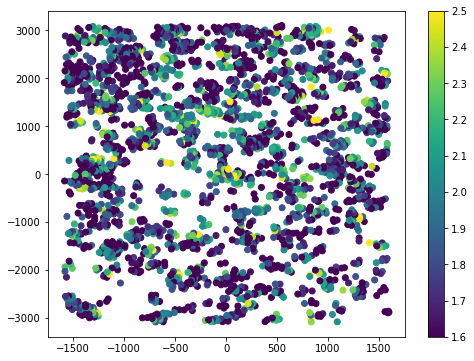

In [72]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['THBS1'], vmin=1.6, vmax=2.5);
plt.colorbar();

In [65]:
results.l.value_counts()

41.851437    98
95.338046    42
Name: l, dtype: int64

In [80]:
results.query('95.338046 - l < 0.1').sort_values('pval').head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D,pval,qval
124,RP4-671O14.6,1.553071,123.509157,1.074937,0.131433,2612,0.001329,95.338046,4,SE,-215.546827,-120.937446,244.446603,7.067725e-137,9.894815e-135
107,C17orf51,1.699762,121.171823,1.203054,0.154051,2612,0.001216,95.338046,4,SE,-210.872160,-100.069588,221.241411,8.868728e-124,1.241622e-121
100,BSN,1.632282,-169.296214,1.031539,0.127272,2612,0.001229,95.338046,4,SE,370.063914,-387.962314,218.666100,2.519621e-122,3.527469e-120
119,NHSL2,1.775947,184.792777,1.192228,0.148637,2612,0.001226,95.338046,4,SE,-338.114068,-31.069419,215.862196,9.633264e-121,1.348657e-118
109,DIEXF,2.066947,164.298489,1.125526,0.128894,2612,0.001230,95.338046,4,SE,-297.125493,-22.872495,187.170984,1.488759e-104,2.084263e-102


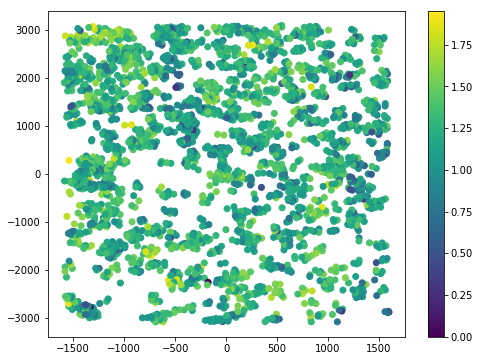

In [81]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['C17orf51']);
plt.colorbar();

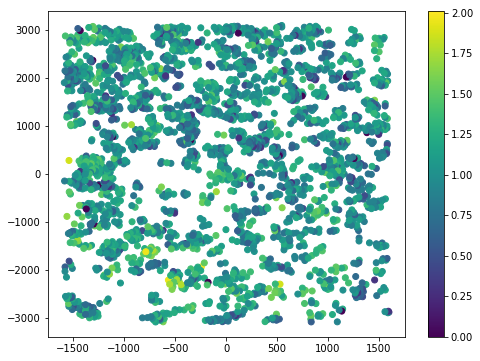

In [82]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['BSN']);
plt.colorbar();

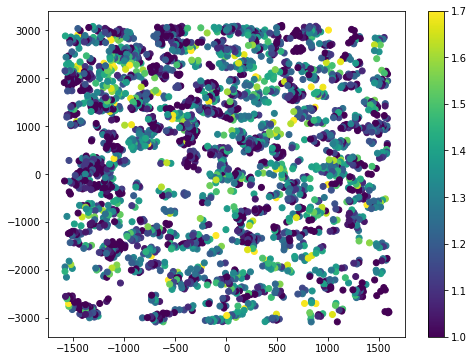

In [105]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['NHSL2'], vmin=1., vmax=1.7);
plt.colorbar();

In [84]:
results.query('95.338046 - l < 0.1').sort_values('max_s2_t_hat')[::-1].head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D,pval,qval
117,LUZP1,1.911640,341.583392,1.279315,0.161957,2612,0.001235,95.338046,4,SE,-651.695297,164.856318,176.727074,1.158891e-98,1.622448e-96
107,C17orf51,1.699762,121.171823,1.203054,0.154051,2612,0.001216,95.338046,4,SE,-210.872160,-100.069588,221.241411,8.868728e-124,1.241622e-121
119,NHSL2,1.775947,184.792777,1.192228,0.148637,2612,0.001226,95.338046,4,SE,-338.114068,-31.069419,215.862196,9.633264e-121,1.348657e-118
131,SSH1,2.063702,72.546531,1.138350,0.132890,2612,0.001300,95.338046,4,SE,-113.621576,-100.185433,172.731964,2.076446e-96,2.907025e-94
124,RP4-671O14.6,1.553071,123.509157,1.074937,0.131433,2612,0.001329,95.338046,4,SE,-215.546827,-120.937446,244.446603,7.067725e-137,9.894815e-135


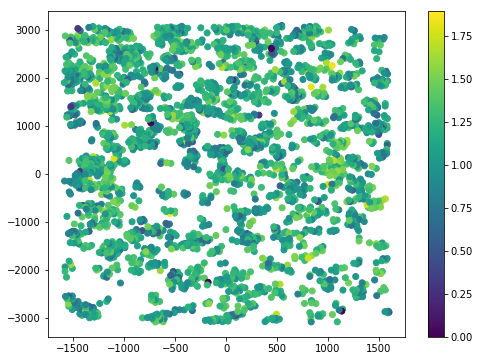

In [86]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['SSH1']);
plt.colorbar();

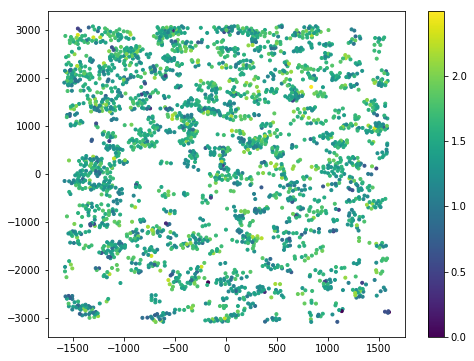

In [100]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm['CENPF'], marker='.');
plt.colorbar();

In [90]:
l_min, l_max = sde.base.get_l_limits(X)

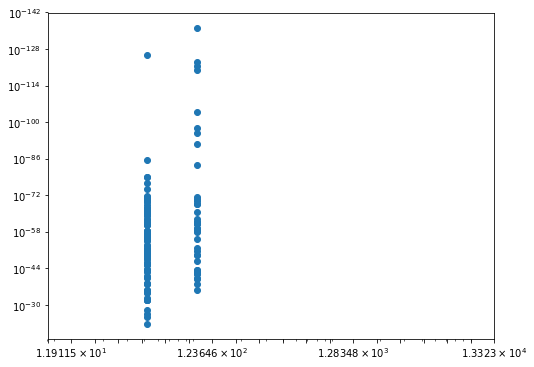

In [92]:
plt.loglog()
plt.scatter(results.l, results.pval)
plt.gca().invert_yaxis();
plt.xticks(np.logspace(np.log10(l_min), np.log10(l_max), 20));

In [93]:
sample_info.abs_X

cellID
2      -1412.140826
3      -1435.472783
4      -1396.981165
5      -1406.990497
9      -1427.218544
10     -1432.488556
11     -1440.932697
12     -1450.162431
13     -1462.236374
14     -1470.660709
15     -1500.610018
16     -1509.282841
17     -1543.004423
18     -1545.773520
19     -1452.645280
20     -1487.358321
21     -1509.685854
22     -1509.053155
23     -1514.121202
24     -1530.927116
25     -1545.672637
26     -1562.247816
27     -1575.924468
28     -1566.548390
31     -1509.164175
32     -1523.661481
33     -1580.379611
35     -1580.847244
36     -1540.232768
39     -1440.290515
           ...     
3004    1448.209051
3005    1407.708598
3006    1515.414866
3007    1465.335695
3008    1425.645617
3011    1531.198405
3012    1517.511131
3013    1473.080280
3016    1567.943874
3017    1542.767263
3018    1504.257022
3019    1478.147063
3021    1567.949147
3022    1579.201570
3023    1539.329483
3024    1527.338199
3025    1473.124915
3026    1532.403176
3027    1516.

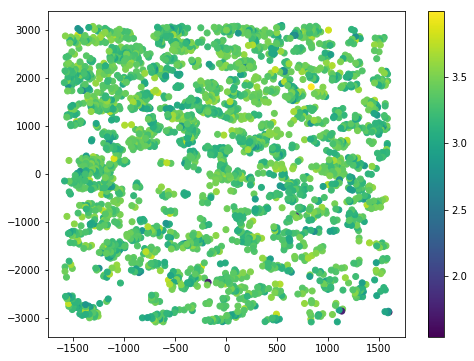

In [143]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=np.log10(exp_mat.sum(1)));
plt.colorbar();

In [141]:
exp_mat.sum(1).sort_values()

cellID
3037      35.0
1595      56.0
2723      59.0
2364      72.0
1193     322.0
146      465.0
2178     465.0
875      477.0
2233     483.0
1219     489.0
2950     538.0
1011     553.0
1798     556.0
92       558.0
2446     577.0
426      581.0
2234     591.0
2594     604.0
2679     612.0
2875     616.0
588      623.0
154      625.0
74       632.0
1951     635.0
3039     637.0
2180     646.0
469      667.0
219      671.0
218      674.0
1186     679.0
         ...  
940     4984.0
2590    4984.0
2063    5076.0
2167    5109.0
108     5166.0
1879    5167.0
2776    5193.0
2874    5269.0
388     5269.0
2635    5283.0
993     5397.0
606     5450.0
1170    5514.0
1334    5514.0
925     5553.0
400     5581.0
2960    5603.0
992     5637.0
1222    5747.0
18      5759.0
1797    5793.0
2184    5909.0
2046    5924.0
1181    5926.0
916     5941.0
2576    6461.0
205     6479.0
575     6982.0
1268    7319.0
2522    9885.0
dtype: float64